<a href="https://colab.research.google.com/github/anudeep22003/nlp-training/blob/main/(chapter_10)_Analyzing_the_Meaning_of_Sentences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import nltk
from nltk import word_tokenize, re, load_parser
from pprint import pprint
from nltk.sem import chat80
nltk.download('city_database')

nltk.download('book_grammars')

[nltk_data] Downloading package city_database to /root/nltk_data...
[nltk_data]   Unzipping corpora/city_database.zip.
[nltk_data] Downloading package book_grammars to /root/nltk_data...
[nltk_data]   Package book_grammars is already up-to-date!


True

# Goals

- How can we represent natural language meaning so that a computer can process these representations?
- How can we associate meaning representations with an unlimited set of sentences?
- How can we use programs that connect the meaning representations of sentences to stores of knowledge?

# Natural Language Understanding

## Querying a database

To answer a simple question from a structured dataset like **"Which country is Athens in?"** we can use an existing book grammar that translates the natual language query to an SQL query representation

Procedure:
- Create a parser by loading the predefined grammar from the book
- Use the parser to parse the sentence, and convert the parse tree into a list to be able to index through it 
- Since the query is contained as a label of the Sentence tree (S), index to the zeroth tree --> generate its label attribute --> index to the `SEM` key value pair
- this value includes both the content as well as empty values, so convert this into a list and then use a join method to combine the list into a string
- this string is the SQL query
- Once the query is generated run the sql query 


In [5]:
nltk.data.show_cfg('grammars/book_grammars/sql0.fcfg')

% start S
S[SEM=(?np + WHERE + ?vp)] -> NP[SEM=?np] VP[SEM=?vp]
VP[SEM=(?v + ?pp)] -> IV[SEM=?v] PP[SEM=?pp]
VP[SEM=(?v + ?ap)] -> IV[SEM=?v] AP[SEM=?ap]
NP[SEM=(?det + ?n)] -> Det[SEM=?det] N[SEM=?n]
PP[SEM=(?p + ?np)] -> P[SEM=?p] NP[SEM=?np]
AP[SEM=?pp] -> A[SEM=?a] PP[SEM=?pp]
NP[SEM='Country="greece"'] -> 'Greece'
NP[SEM='Country="china"'] -> 'China'
Det[SEM='SELECT'] -> 'Which' | 'What'
N[SEM='City FROM city_table'] -> 'cities'
IV[SEM=''] -> 'are'
A[SEM=''] -> 'located'
P[SEM=''] -> 'in'


In [16]:
cp = load_parser('grammars/book_grammars/sql0.fcfg')
query = "What cities are located in China"
query_tokens = query.split()

i = 0

for tree in cp.parse(query_tokens):
  print("Label: {}\n Type: {}".format(tree.label(), type(tree.label())))
  print(tree.label()['SEM'], end ='\n\n')
  for s in tree.label()['SEM']:
    print(s)

trees = list(cp.parse(query_tokens))
sem_labels = trees[0].label()['SEM']
q = [s for s in sem_labels if s] 
q = " ".join(q)

print(q)

Label: [ *type* = 'S'                                                        ]
[ SEM    = (SELECT, City FROM city_table, WHERE, , , Country="china") ]
 Type: <class 'nltk.grammar.FeatStructNonterminal'>
(SELECT, City FROM city_table, WHERE, , , Country="china")

SELECT
City FROM city_table
WHERE


Country="china"
SELECT City FROM city_table WHERE Country="china"


In [26]:
rows = chat80.sql_query('corpora/city_database/city.db', q)

# creates a generator object
print(list(rows))

# each row r is a one element tuple, hence we index to r[0]
for r in rows:
  print(r[0], end = " ")

[('canton',), ('chungking',), ('dairen',), ('harbin',), ('kowloon',), ('mukden',), ('peking',), ('shanghai',), ('sian',), ('tientsin',)]


## 1.2 Natural Language, Semantics and Logic

We can represent a sentence as the `relation` between two entitites. Specifically, say entities "Anudeep" and entities "Fiero" which is his toycar are related by the relation of `love` to give `Anudeep loves Fiero`
This statement also has a declarative natue, it can be true of false. 

So a general stating of this:
- a sentence is declarative, i.e. can be true or false
- Definite noun phrases, proper and common nouns refer to things in the real world

Essentially we generalize languahe based on a similar concept to computers - True or False, 0 or 1. We analyze sentences by extracting a logical structure and then checking if the statement (given other statements) is True or False.

> We formally use set theory to represent the structure of sentences. 

eg: 
- Let's say the set of 3 individuals that make up the scope of discourse are Adam, Jack, and Eve. 
- Adam and Jack are boys and Eve is a Girl 
- Jack and Eve are running

```

Discourse set --> D: {Adam, Jack, Eve}
Running set --> R: {Jack, Eve}
Boys --> B: {Adam, Jack}
Girls --> G: {Eve}

```


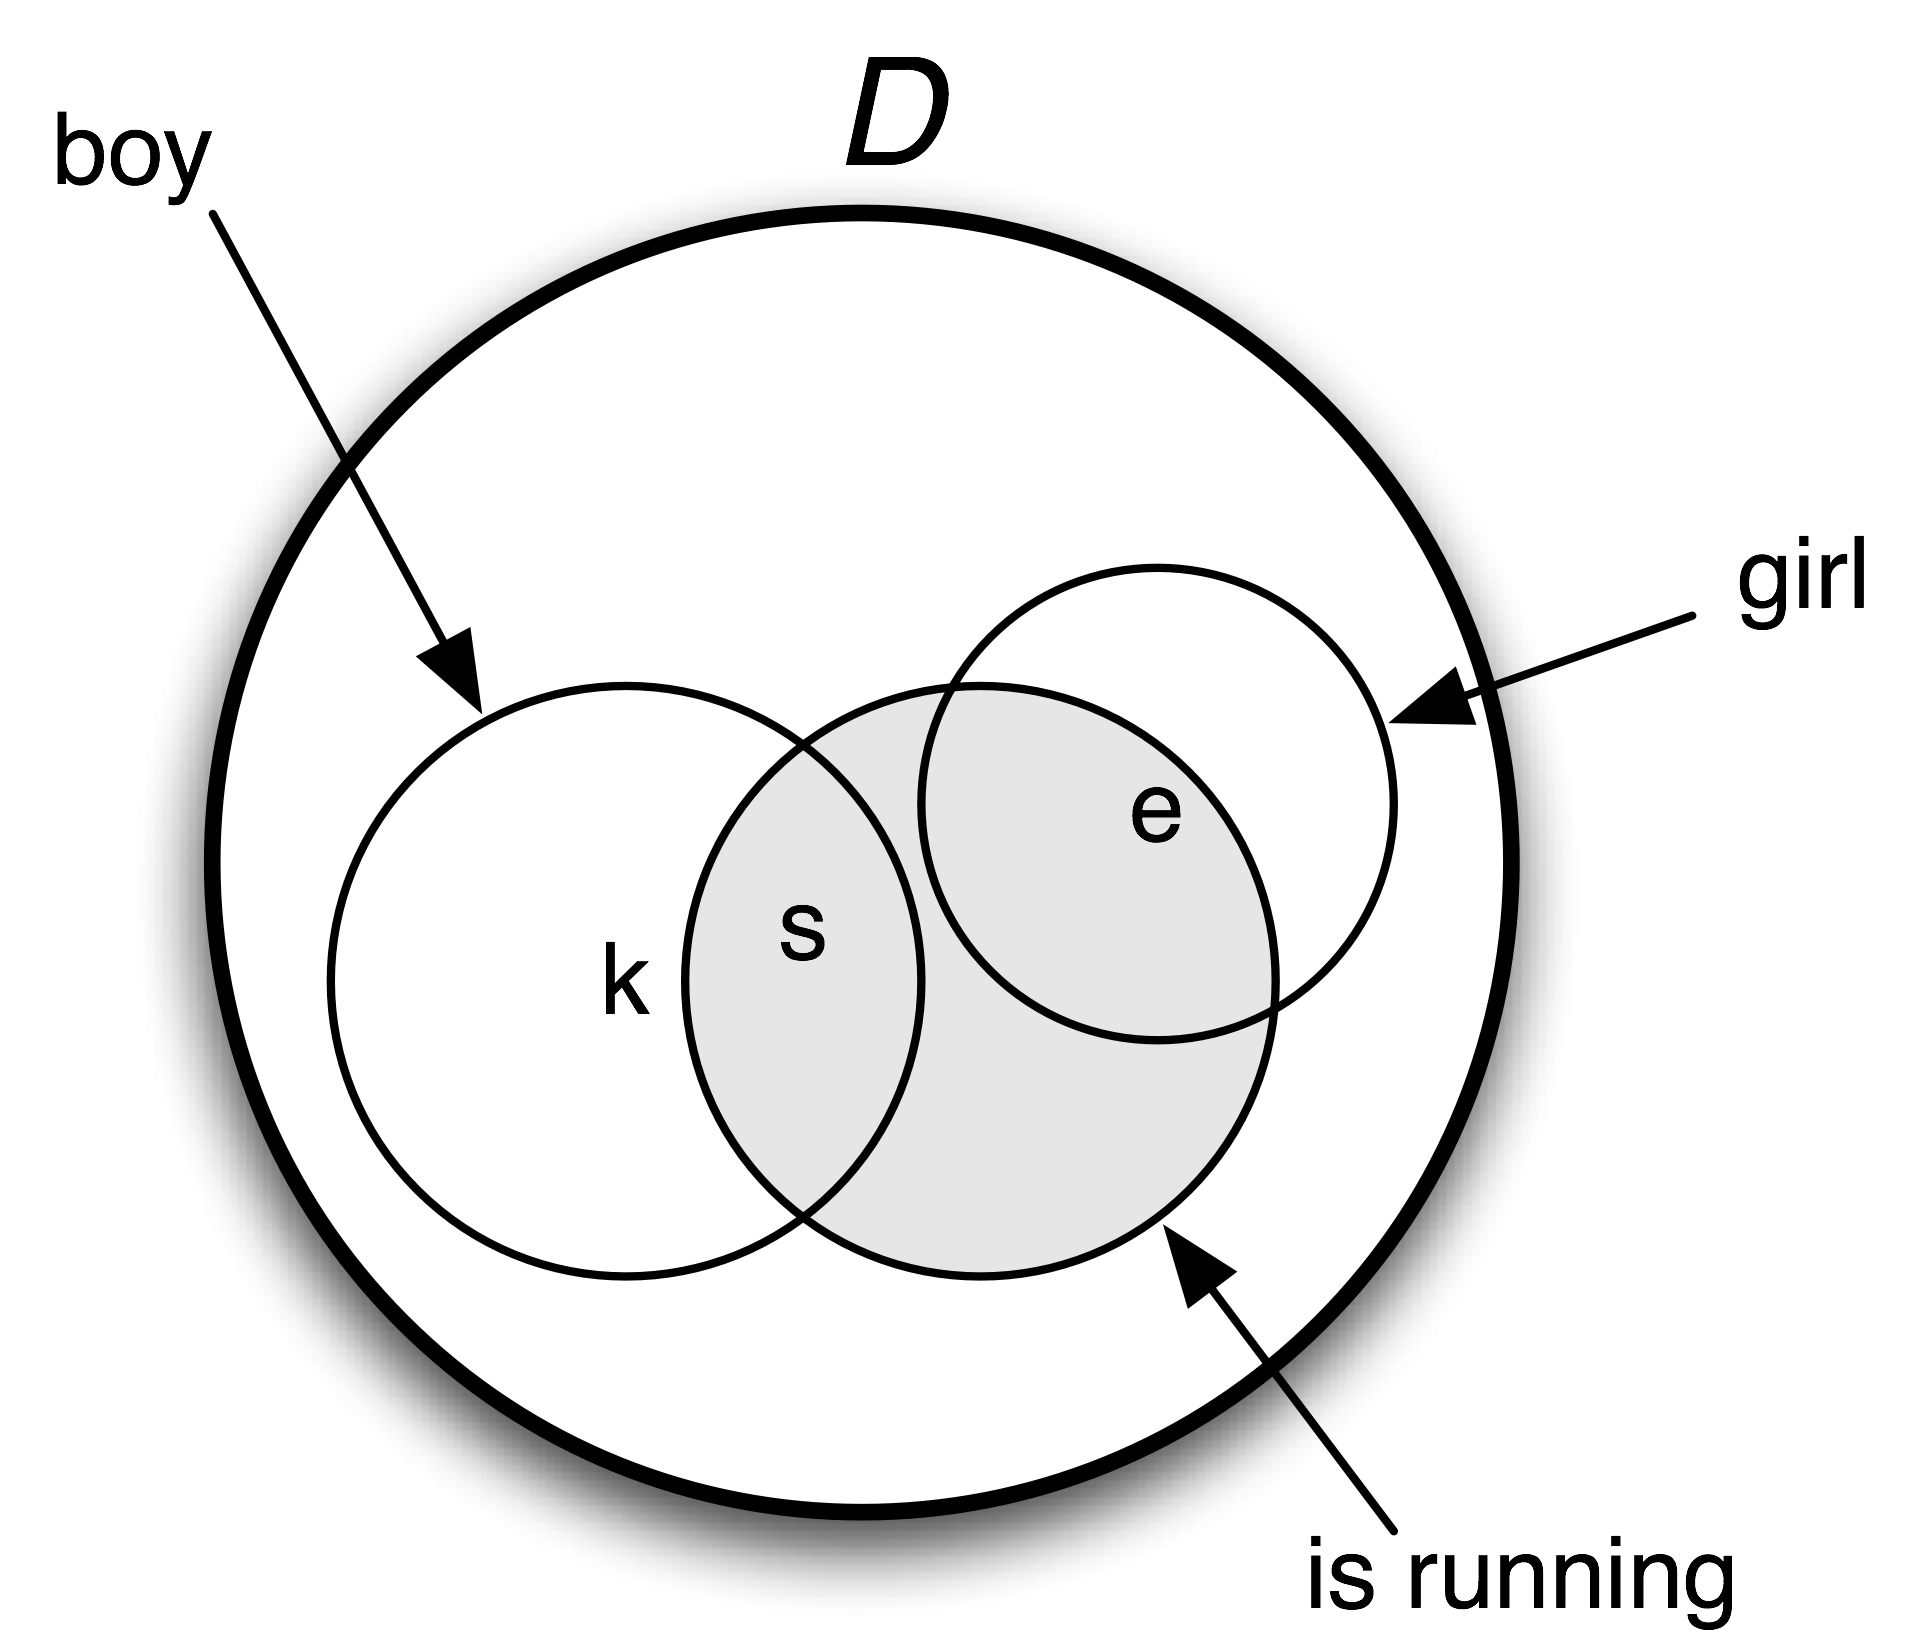


# 2. Propositional Logic


